# Task 3: To Explore Unsupervised Machine Learning (K-Means Clustering).

From the given ‘Iris’ dataset, we need to predict the optimum number of clusters and represent it visually.

### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans

### Importing the data.

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Shape of the data.

In [3]:
df.shape

(150, 6)

#### Hence, there are 150 rows and 6 coluns.

In [4]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


### Checking for any null values, if any, in the data.

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Hence, the data doesn't have any missing values.

### Descriptive statistics of the data.

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Plotting boxplot.

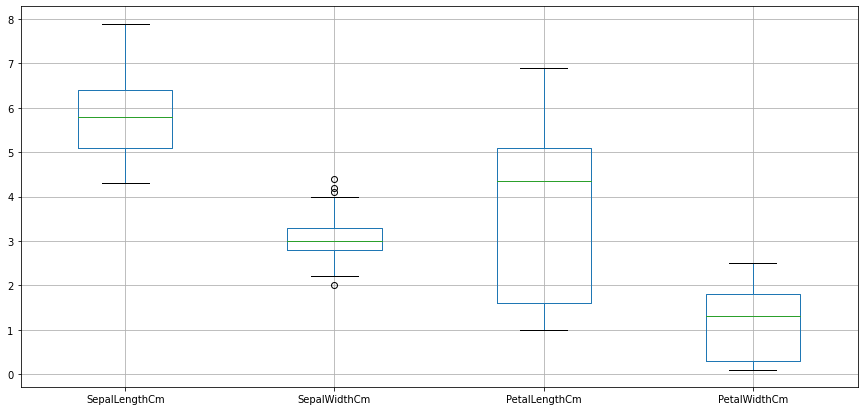

In [7]:
plt.figure(figsize = (15, 7))
df.boxplot(column = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']);

Above boxplot shows the presence of some outliers in `SepalWidthCm`.

### Plotting correlation matrix.

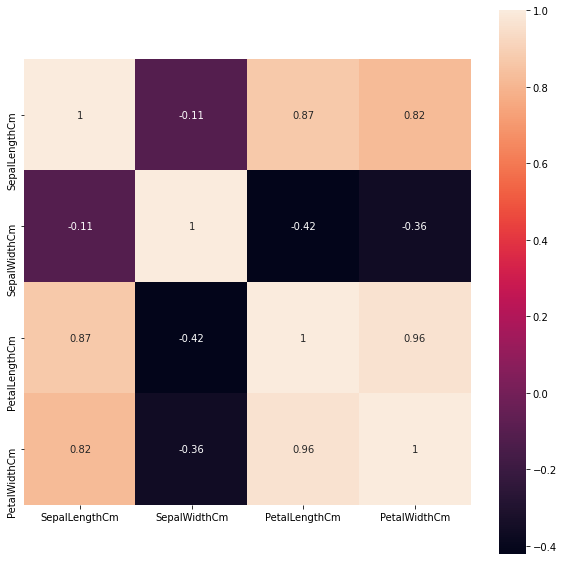

In [8]:
plt.figure(figsize = (10, 10))
sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), annot = True, square = True);

### Plotting pairplot.

C:\Users\admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


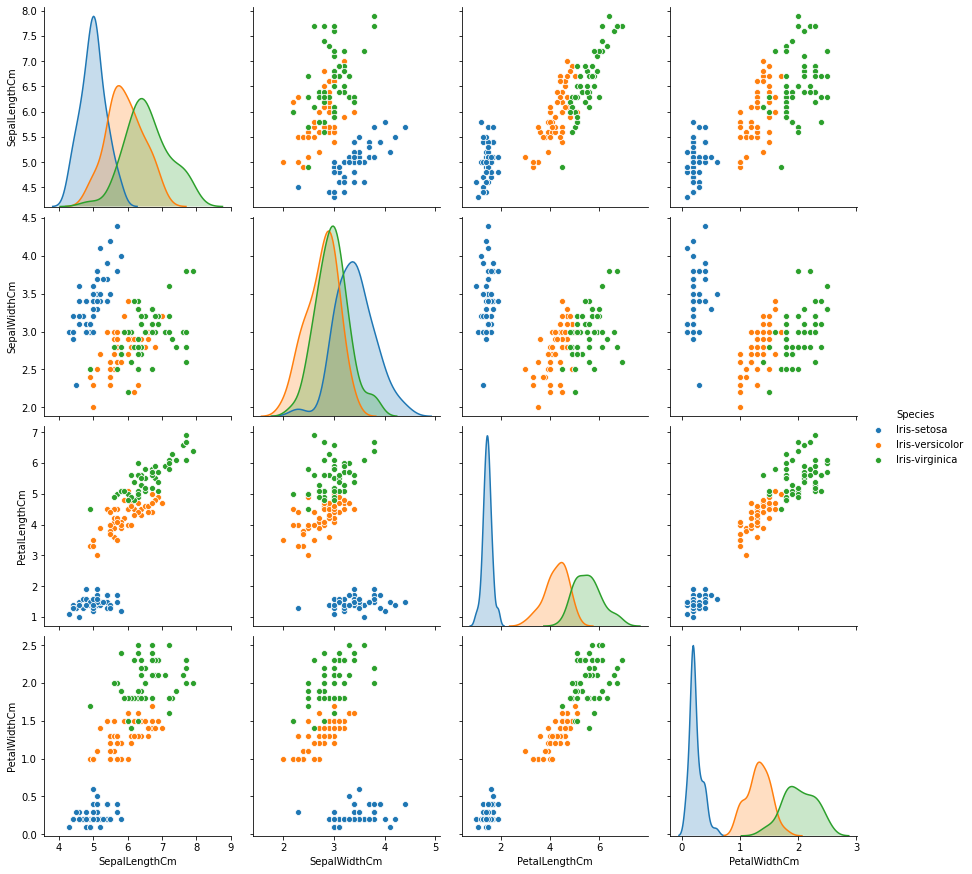

In [9]:
sns.pairplot(data = df, x_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
             y_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  hue = 'Species', size = 3);

### Finding Optimum Number of Clusters.

In [10]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

WCSS = []  # within cluster sum of squares.

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

### Plotting the graph to find the optimal number of clusters using the elbow method.

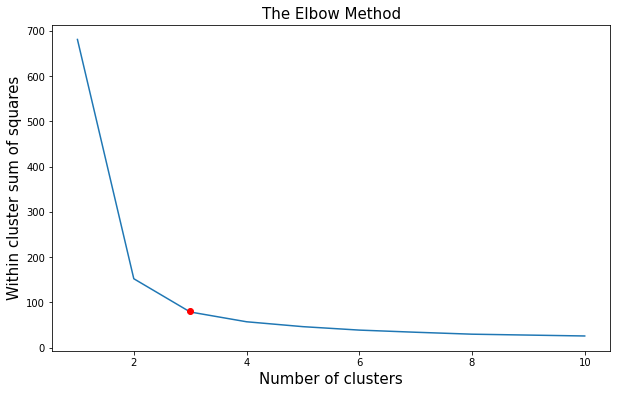

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), WCSS) 
plt.plot(range(3, 4), range(81, 82), 'ro')
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Within cluster sum of squares', fontsize = 15);

### From the above graph, the optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. The highlighted red dot which shows the number of clusters as `3` is the optimum number of clusters.

---

### Fitting and predicting the model.

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [13]:
x_pred = kmeans.predict(x)
print(x_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Visualization of the clustered plot.

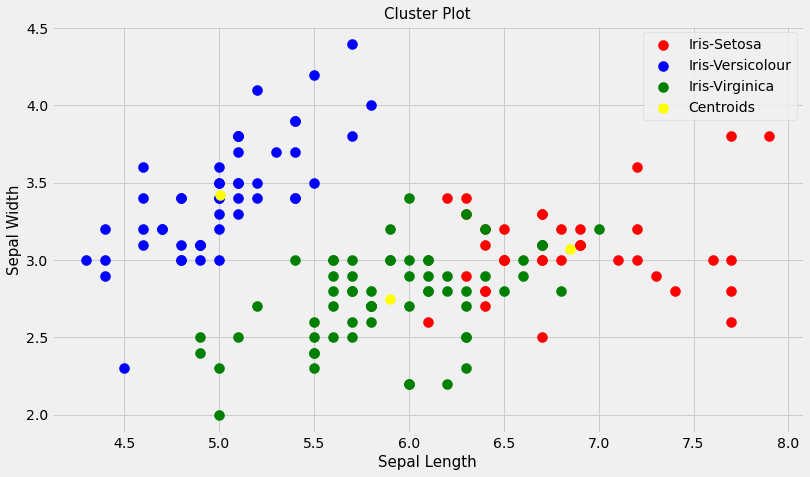

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 7))
plt.title('Cluster Plot', fontsize = 15)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)

plt.scatter(x[x_pred == 0, 0], x[x_pred == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')

plt.scatter(x[x_pred == 1, 0], x[x_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')

plt.scatter(x[x_pred == 2, 0], x[x_pred == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'best');